# Введение в искусственные нейронные сети
# Домашнее задание 3. TensorFlow

## Практическое задание

  1. Постройте нейронную сеть (берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу. Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

In [59]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from itertools import product
import seaborn as sns

In [73]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data(test_split=0.2, 
                                                                seed=113)

In [39]:
all_data = np.append(x_train, x_test, axis=0)
all_data.shape

(506, 13)

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [40]:
x_train.shape

(404, 13)

In [41]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.23247,0.0,8.14,0.0,0.538,6.142,91.7,3.9769,4.0,307.0,21.0,396.90,18.72
1,0.02177,82.5,2.03,0.0,0.415,7.610,15.7,6.2700,2.0,348.0,14.7,395.38,3.11
2,4.89822,0.0,18.10,0.0,0.631,4.970,100.0,1.3325,24.0,666.0,20.2,375.52,3.26
3,0.03961,0.0,5.19,0.0,0.515,6.037,34.5,5.9853,5.0,224.0,20.2,396.90,8.01
4,3.69311,0.0,18.10,0.0,0.713,6.376,88.4,2.5671,24.0,666.0,20.2,391.43,14.65


In [42]:
x_test.shape

(102, 13)

In [43]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,18.08460,0.0,18.10,0.0,0.679,6.434,100.0,1.8347,24.0,666.0,20.2,27.25,29.05
1,0.12329,0.0,10.01,0.0,0.547,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
2,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
3,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
4,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44


In [44]:
len(y_train)

404

Приведем данные в диапазон от 0 до 1:

In [45]:
scaler = StandardScaler()
scaler.fit(all_data)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.277091,-0.487722,-0.437258,-0.272599,-0.144217,-0.203205,0.822342,0.086449,-0.637962,-0.601276,1.176466,0.441052,0.850425
1,-0.417984,3.053142,-1.328764,-0.272599,-1.206732,1.888194,-1.880262,1.176518,-0.867883,-0.357765,-1.736418,0.424386,-1.337687
2,0.149504,-0.487722,1.015999,-0.272599,0.659147,-1.872905,1.117494,-1.170617,1.661245,1.530926,0.806576,0.206634,-1.316661
3,-0.415908,-0.487722,-0.867691,-0.272599,-0.342899,-0.352794,-1.211723,1.041181,-0.523001,-1.094237,0.806576,0.441052,-0.650836
4,0.009262,-0.487722,1.015999,-0.272599,1.367490,0.130165,0.704992,-0.583726,1.661245,1.530926,0.806576,0.381077,0.279918


In [47]:
pd.DataFrame(x_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.684046,-0.487722,1.015999,-0.272599,1.073787,0.212795,1.117494,-0.931886,1.661245,1.530926,0.806576,-3.611923,2.298421
1,-0.406170,-0.487722,-0.164408,-0.272599,-0.066472,-0.529452,0.865014,-0.685312,-0.408041,0.141134,-0.303094,0.419671,0.498589
2,-0.414120,-0.487722,-0.867691,-0.272599,-0.342899,-0.426877,-0.824113,0.483525,-0.523001,-1.094237,0.806576,0.441052,-0.408335
3,-0.272321,-0.487722,1.231945,3.668398,0.434551,-0.049342,0.854346,-0.949142,-0.523001,-0.031105,-1.736418,-0.194662,-1.002672
4,-0.412196,-0.487722,-0.969827,-0.272599,-0.913029,-0.233123,-0.418722,-0.022553,-0.752922,-0.957633,0.020560,0.421864,-0.590561


## Построение базовой модели

Построим модель со случайными параметрами для оценки правильности решения.

In [48]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
import tensorflow

In [49]:
inputs = Input(shape=(13,))
x = Dense(64, activation='relu')(inputs)
x1 = Dense(64, activation='relu')(x)
outputs = Dense(1)(x1)

model = Model(inputs,outputs)

In [50]:
model.summary()

Model: "model_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_113 (InputLayer)       [(None, 13)]              0         
_________________________________________________________________
dense_114 (Dense)            (None, 64)                896       
_________________________________________________________________
dense_115 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Метрика - r2, loss = MSE.

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tfa.metrics.RSquare(y_shape=(1,))])

In [52]:
history = model.fit(x_train, y_train, epochs=800, validation_split = 0.2, verbose=0)

In [53]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,r_square,val_loss,val_r_square,epoch
795,0.854887,0.989842,15.429121,0.817453,795
796,0.902271,0.989279,16.026754,0.810383,796
797,0.905842,0.989236,15.452543,0.817176,797
798,0.885043,0.989483,15.718114,0.814034,798
799,0.878782,0.989558,15.298638,0.818997,799


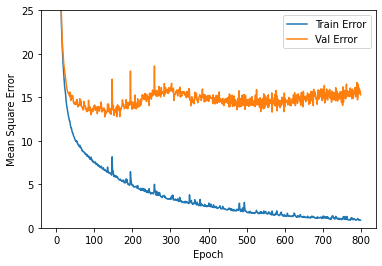

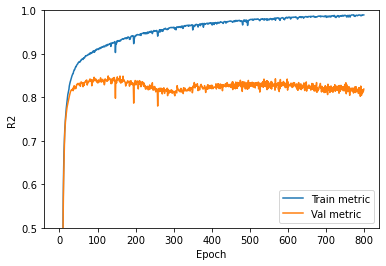

In [54]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['loss'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'],
           label = 'Val Error')
    plt.ylim([0,25])
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('R2')
    plt.plot(hist['epoch'], hist['r_square'],
           label='Train metric')
    plt.plot(hist['epoch'], hist['val_r_square'],
           label = 'Val metric')
    plt.ylim([0.5,1])
    plt.legend()
    plt.show()


plot_history(history)

Видно, что на числе эпох > 150 потери на валидационной выборке практически не уменьшаются, метрика даже ухудшается.

Проверим работу модели на тесте.

Training set MSE: 4.0122528076171875, r2: 0.95258629322052
Testing set MSE: 18.245798110961914, r2: 0.7808148860931396


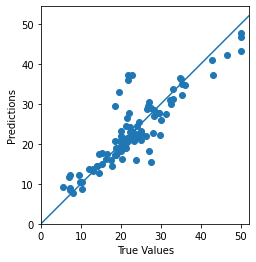

In [55]:
test_predictions = model.predict(x_test)
train_predictions = model.predict(x_train)

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

loss, r2 = model.evaluate(x_test, y_test, verbose=0)
tr_loss, tr_r2 = model.evaluate(x_train, y_train, verbose=0)

print(f'Training set MSE: {tr_loss}, r2: {tr_r2}')
print(f'Testing set MSE: {loss}, r2: {r2}')

Модель относительно неплохо справляется с предсказаниями, однако она немного переобучилась.

### Сделаем подбор параметров (число нейронов, слоев, функцию активации, оптимизатор, функцию потерь). Используем метрику r2.

In [75]:
parameters = {'neuron_n': [32, 64, 128], 
              'layers_n': [1, 2, 3], 
              'activation': ['relu', 'linear'], 
              'optimizer': ['adam', 
                            'rmsprop'],
              'loss': ['mae', 
                       'mse']}

In [82]:
%%time
results = []
for temp_params in product(*parameters.values()):
    temp_parameters = {'neuron_n': temp_params[0], 
                       'layers_n': temp_params[1], 
                       'activation': temp_params[2], 
                       'optimizer': temp_params[3], 
                       'loss': temp_params[4],
                       'epochs': 0,
                       'r2_score_train': 0,
                       'r2_score_test': 0}
    inputs = Input(shape=(13,))
    for i in range(temp_parameters['layers_n']):
        if i > 0:
            x = Dense(temp_parameters['neuron_n'], 
                      name='dense_'+str(i), 
                      activation=temp_parameters['activation'])(x)
        else:
            x = Dense(temp_parameters['neuron_n'], 
                      name='dense_'+str(i), 
                      activation=temp_parameters['activation'])(inputs) 
    outputs = Dense(1)(x)
    model_temp = Model(inputs=inputs, outputs=outputs)  
    model_temp.compile(optimizer=temp_parameters['optimizer'],
                       loss=temp_parameters['loss'],
                       metrics=[tfa.metrics.RSquare(y_shape=(1,))])
    # ранняя остановка обучения при отсутствия существенного уменьшения ошибки на валидационной выборке
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    history = model_temp.fit(x_train, y_train, epochs=800, 
                             validation_split=0.2, 
                             verbose=0, 
                             callbacks=[early_stop])

    res = model_temp.predict(x_test)
    temp_parameters['r2_score_test'] = model_temp.evaluate(x_test, y_test, verbose=0)[1]
    temp_parameters['r2_score_train'] = model_temp.evaluate(x_train, y_train, verbose=0)[1]
    temp_parameters['epochs'] = history.epoch[-1]
    results.append(temp_parameters)

CPU times: user 3min 37s, sys: 18.6 s, total: 3min 56s
Wall time: 3min 15s


In [83]:
pd.set_option('display.max_rows', None)
df = pd.DataFrame(results).sort_values('r2_score_test', ascending=False)
df

,neuron_n,layers_n,activation,optimizer,loss,epochs,r2_score_train,r2_score_test
0,32,1,relu,adam,mae,255,0.846244,0.834446
2,32,1,relu,rmsprop,mae,272,0.830769,0.824724
24,64,1,relu,adam,mae,130,0.837368,0.809241
26,64,1,relu,rmsprop,mae,232,0.852430,0.807596
50,128,1,relu,rmsprop,mae,131,0.850299,0.806166
42,64,3,relu,rmsprop,mae,32,0.817897,0.803041
48,128,1,relu,adam,mae,127,0.871239,0.799435
58,128,2,relu,rmsprop,mae,38,0.845611,0.789119
10,32,2,relu,rmsprop,mae,108,0.845820,0.783365
52,128,1,linear,adam,mae,50,0.684602,0.775841


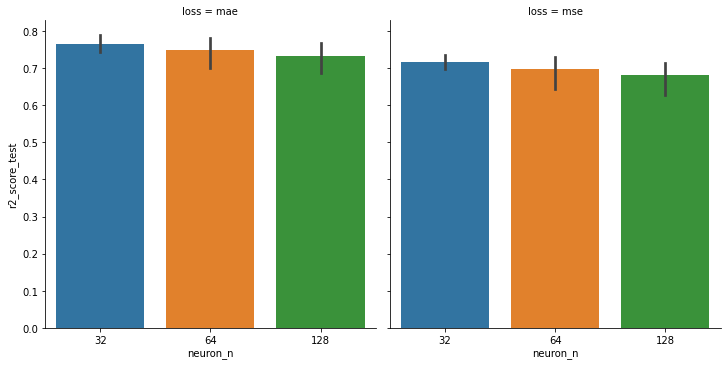

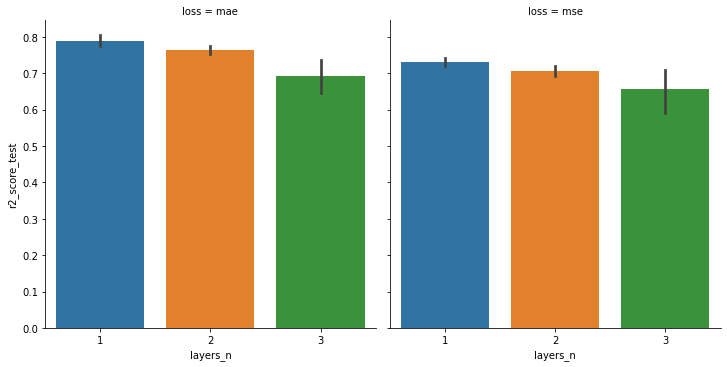

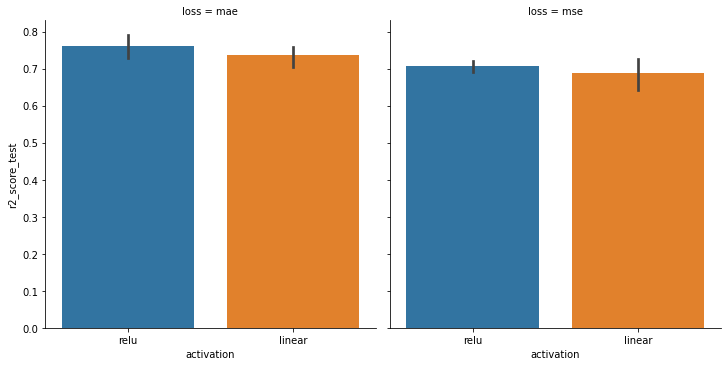

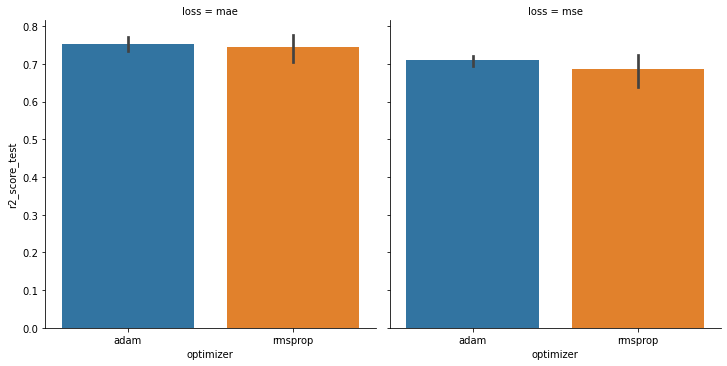

In [85]:
for column in df.columns[:4]:
    sns.catplot(column, 'r2_score_test', col='loss', data=df, kind='bar')

Видно, что больше всего на результат влиял loss (результаты с MAE лучше, чем с MSE), функция активации relu, меньшее число слоев (1) и кол-во нейронов (32), оптимизаторы практически идентичны (Adam немного лучше).

При этом, стоит заметить, что обучение во всех случаях останавливалось раньше по критерию отсутствия достаточного снижения ошибки на валидационной выборке (вместо заданных 800 эпох максимально проходило < 300).

### 3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

При выполнении работы для сокращения времени подбора параметров сильно помог функционал tensorflow.keras.callbacks.EarlyStopping для остановки обучения после определенного количества эпох без снижения ошибки (для решения ставилось 10 эпох без улучшения). 

Также просмотрел документацию модуля tensorflow-addons (дополнительные оптимизаторы, функции потерь и метрики), в работе использована метрика R2 из указанного модуля.